In [1]:
import os


In [2]:
import matplotlib.pyplot as plt


In [3]:
plt.plot()

[]

84.21052631578948 % accuracy obtained with kernel = linear
81.57894736842105 % accuracy obtained with kernel = poly
84.21052631578948 % accuracy obtained with kernel = rbf


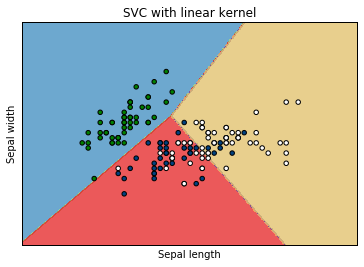

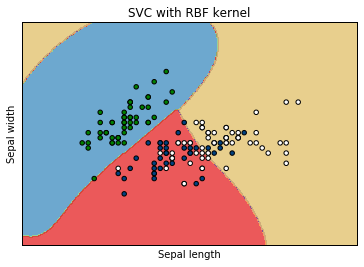

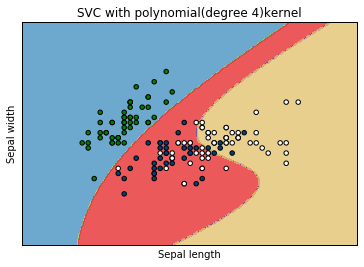

In [4]:

from __future__ import division, print_function
import numpy as np
from sklearn import datasets,svm
from sklearn.cross_validation import train_test_split
%matplotlib inline
iris=datasets.load_iris()
X=iris.data[:,:2]
Y=iris.target
#print(X)
#print(Y)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
def evaluate_on_test_data(model=None):
    predictions=model.predict(X_test)
    correct_classification=0
    for i in range(len(Y_test)):
        if predictions[i]==Y_test[i]:
            correct_classification+=1
    accuracy=(correct_classification*100)/len(Y_test)
    return accuracy
kernels=('linear','poly','rbf')
accuracies=[]
for index,kernel in enumerate(kernels):
    model=svm.SVC(kernel=kernel)
    model.fit(X_train,Y_train)
    acc=evaluate_on_test_data(model)
    accuracies.append(acc)
    print("{} % accuracy obtained with kernel = {}".format(acc,kernel))
#Train SVMs with different kernels
svc=svm.SVC(kernel='linear').fit(X_train,Y_train)
rbf_svc=svm.SVC(kernel='rbf',gamma=0.7).fit(X_train,Y_train)
poly_svc=svm.SVC(kernel='poly',degree=4).fit(X_train,Y_train)
h=.02
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
titles=['SVC with linear kernel','SVC with RBF kernel','SVC with polynomial(degree 4)kernel']
for i,clf in enumerate((svc,rbf_svc,poly_svc)):
    plt.figure(i)
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z,cmap=plt.cm.Paired,alpha=0.8)
    plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.ocean)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()
      
